In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
kras_count_sample = pd.read_csv("../GENIE_data/GENIE_v8/genie_v8_kras_mutation_count_sample.csv", index_col=0)
kras_count_sample
#row names are specific samples

,KRAS_COUNT,PATIENT_ID,AGE_AT_SEQ_REPORT,ONCOTREE_CODE,SAMPLE_TYPE,SEQ_ASSAY_ID,CANCER_TYPE,CANCER_TYPE_DETAILED,SAMPLE_TYPE_DETAILED,CENTER,SEX,PRIMARY_RACE,ETHNICITY,CENTER.1
GENIE-COLU-00079-01,1,GENIE-COLU-00079,74,COAD,Primary,COLU-CCCP-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,COLU,Female,Unknown,Unknown,COLU
GENIE-COLU-00086-01,1,GENIE-COLU-00086,65,READ,Metastasis,COLU-CCCP-V1,Colorectal Cancer,Rectal Adenocarcinoma,Lymph node metastasis,COLU,Female,Black,Non-Spanish/non-Hispanic,COLU
GENIE-COLU-00100-01,1,GENIE-COLU-00100,59,COAD,Primary,COLU-CCCP-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,COLU,Male,Unknown,Unknown,COLU
GENIE-COLU-00179-01,1,GENIE-COLU-00179,31,COADREAD,Metastasis,COLU-CCCP-V1,Colorectal Cancer,Colorectal Adenocarcinoma,Distant organ metastasis,COLU,Female,Asian,Unknown,COLU
GENIE-COLU-00195-01,0,GENIE-COLU-00195,84,READ,Unspecified,COLU-CCCP-V1,Colorectal Cancer,Rectal Adenocarcinoma,Not otherwise specified,COLU,Male,Unknown,Unknown,COLU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GENIE-YALE-TPL648-1,1,GENIE-YALE-TPL648,47,COAD,Metastasis,YALE-OCP-V3,Colorectal Cancer,Colon Adenocarcinoma,Distant organ metastasis,YALE,Male,White,Non-Spanish/non-Hispanic,YALE
GENIE-YALE-TPL75-1,0,GENIE-YALE-TPL75,58,COADREAD,Metastasis,YALE-HSM-V1,Colorectal Cancer,Colorectal Adenocarcinoma,Distant organ metastasis,YALE,Male,Unknown,Non-Spanish/non-Hispanic,YALE
GENIE-YALE-TPL82-1,0,GENIE-YALE-TPL82,62,COAD,Primary,YALE-HSM-V1,Colorectal Cancer,Colon Adenocarcinoma,Primary tumor,YALE,Female,White,Non-Spanish/non-Hispanic,YALE
GENIE-YALE-TPL91-1,1,GENIE-YALE-TPL91,72,READ,Primary,YALE-HSM-V1,Colorectal Cancer,Rectal Adenocarcinoma,Primary tumor,YALE,Male,White,Non-Spanish/non-Hispanic,YALE


In [96]:
#Shows the different types of Samples: Metastasis, NA, Not collected, Primary, Unspecified
#Second array shows the number of each type in the same order
#If using a jupyter notebook, can change "SAMPLE_TYPE" to the name of any column listed
print(kras_count.columns)
print( np.unique(kras_count["SAMPLE_TYPE"], return_counts=True) )

Index(['KRAS_COUNT', 'PATIENT_ID', 'AGE_AT_SEQ_REPORT', 'ONCOTREE_CODE',
       'SAMPLE_TYPE', 'SEQ_ASSAY_ID', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED',
       'SAMPLE_TYPE_DETAILED', 'CENTER', 'SEX', 'PRIMARY_RACE', 'ETHNICITY',
       'CENTER.1'],
      dtype='object')
(array(['Metastasis', 'Not Applicable or Heme', 'Not Collected', 'Primary',
       'Unspecified'], dtype=object), array([3215,   77,   82, 5984,   37]))


In [22]:
kras_count_patient = pd.read_csv("../GENIE_data/GENIE_v8/genie_v8_kras_mutation_count_patient.csv", index_col=0)
kras_count_patient
#row names are patient

,KRAS_MUT,SEX,PRIMARY_RACE,ETHNICITY,CENTER,NUM_SAMP,SAMP_CONSIS
GENIE-VICC-102225,False,Female,White,Non-Spanish/non-Hispanic,VICC,1,True
GENIE-VICC-108156,True,Female,White,Non-Spanish/non-Hispanic,VICC,1,True
GENIE-VICC-111844,True,Female,White,Unknown,VICC,1,True
GENIE-VICC-113062,False,Male,White,Unknown,VICC,1,True
GENIE-VICC-114230,False,Female,Black,Non-Spanish/non-Hispanic,VICC,1,True
...,...,...,...,...,...,...,...
GENIE-PHS-c28542d1,True,Female,White,Spanish/Hispanic,PHS,1,True
GENIE-PHS-d186889f,False,Female,Asian,Spanish/Hispanic,PHS,1,True
GENIE-PHS-f2586482,False,Male,White,Spanish/Hispanic,PHS,1,True
GENIE-PHS-f53567c6,True,Male,White,Spanish/Hispanic,PHS,1,True


In [28]:
#NUM_SAMP column tells how many samples were collected for that patient
#SAMP_CONSIS column tells if these samples were consistent for the patient
#Below code shows that out of the 301 patients that have multiple samples, 
    #271 have consistent KRAS mutation status with regards to mutation/no mutation

print( sum(kras_count_patient[ kras_count_patient["NUM_SAMP"] > 1 ]["SAMP_CONSIS"]) )
print( kras_count_patient[ kras_count_patient["NUM_SAMP"] > 1 ].shape[0] )

271
301


In [43]:
#Percent of colorectal patients with KRAS mutations?
sum( kras_count_patient["KRAS_MUT"] ) / kras_count_patient.shape[0]

0.4399691017435445

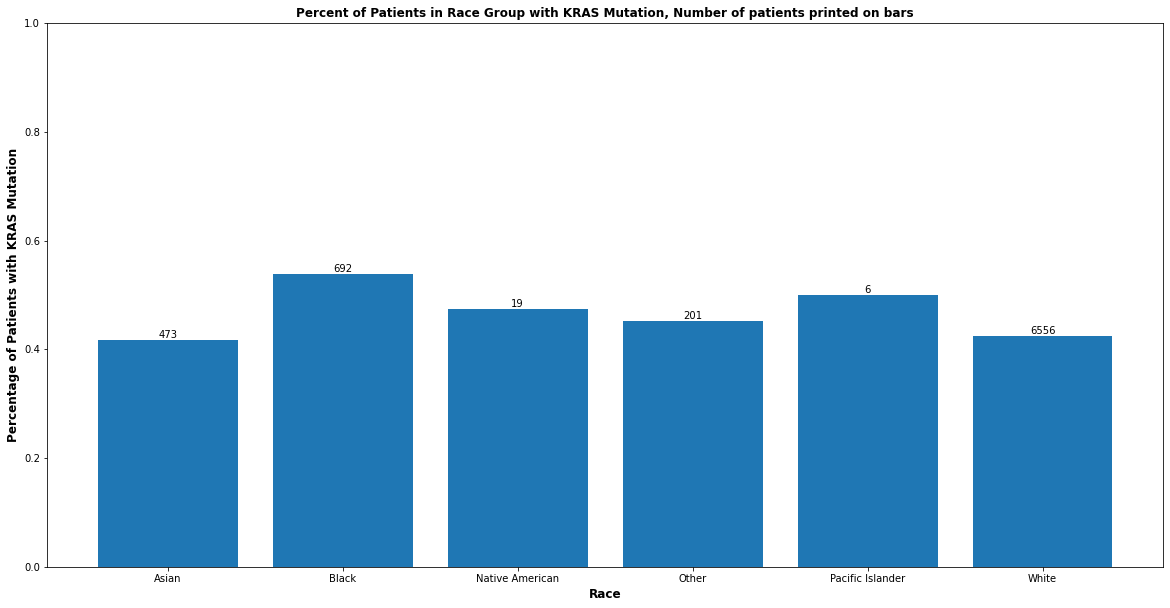

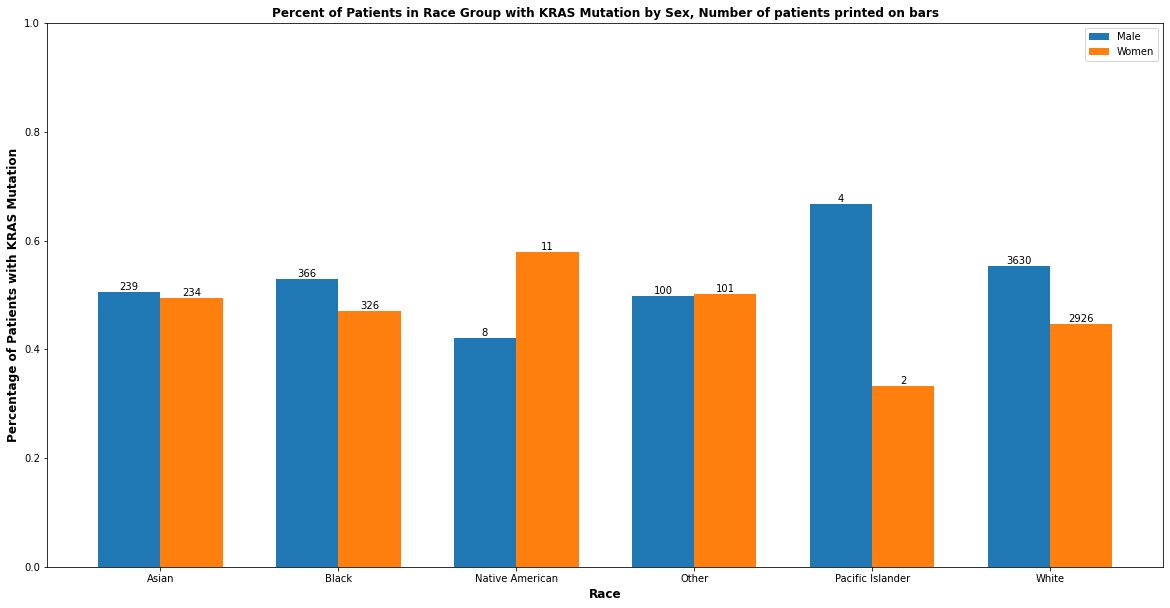

In [97]:
#ADD P VALUES
#Patients with KRAS mutations broken down by race? Grouped by gender?
#NOTE: Race is different than ethnicity. Spanish/Hispanic is only an option in Ethnicity 

race_list = np.unique( kras_count_patient["PRIMARY_RACE"] )

race_mut = []
race_mut_female = []
race_mut_male = []
race_mut_unknown = []
total_race_list=[]
total_race_male = []
total_race_female = []
x_labels=[]

#loop through all races
for race in race_list:    
    
    #skip NA, Unknown, and Not collected races
    if race in ["Not Applicable", "Unknown", "Not collected"]:
        continue
        
    #will use to label bar graphs
    x_labels.append(race)
    
    #subset to patients of specific race
    race_df = kras_count_patient[ kras_count_patient["PRIMARY_RACE"] == race ]
    
    #total number of patients of specific race
    total_race = race_df.shape[0] 
    total_race_list.append(total_race)
    
    #breakdown of racial group into male / female
    total_race_male.append( sum( race_df["SEX"] == "Male" ) )
    total_race_female.append( sum( race_df["SEX"] == "Female" ) )
    
    #find patients with KRAS mutations 
    #calculate percentage by dividing num of patients with KRAS by total number of patients in race
    #repeat with male and female
    race_mut.append( sum( race_df["KRAS_MUT"] ) / total_race )
    race_mut_female.append( sum( race_df["SEX"] == "Female" ) / total_race )
    race_mut_male.append( sum( race_df["SEX"] == "Male" ) / total_race )
    #race_mut_unknown.append( sum( race_df["SEX"] == "Unknown" ) / total_race )
    
#create first bar plot, overall percentage of racial group with KRAS mutation
plt.figure(figsize=(20,10))
bar1 = plt.bar( x_labels, race_mut )
plt.ylabel("Percentage of Patients with KRAS Mutation", fontsize="large", fontweight="semibold")
plt.ylim(0,1)
plt.xlabel("Race", fontsize="large", fontweight="semibold")

#label first bar plot
for i,rect in enumerate(bar1):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_list[i], ha='center', va='bottom')

plt.title("Percent of Patients in Race Group with KRAS Mutation, Number of patients printed on bars", \
                 fontweight="semibold", fontsize="large")
#show first bar plot
plt.show()

#create second bar plot, divide each racial group by sex
fig, ax = plt.subplots( figsize=(20,10) )
ind = np.arange(len(x_labels))  # the x locations for the groups
width = 0.35  # the width of the bars

bar_male = ax.bar(ind - width/2, race_mut_male, width, label='Male')
bar_female = ax.bar(ind + width/2, race_mut_female, width, label='Women')

ax.set_xlabel("Race", fontsize="large", fontweight="semibold")
ax.set_ylabel("Percentage of Patients with KRAS Mutation", fontsize="large", fontweight="semibold")
ax.set_title("Percent of Patients in Race Group with KRAS Mutation by Sex, Number of patients printed on bars", \
                 fontweight="semibold", fontsize="large")
ax.set_xticks(ind)
ax.set_xticklabels( x_labels )
ax.set_ylim(0,1)
ax.legend()

for i,rect in enumerate(bar_male):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_male[i], ha='center', va='bottom')

for i,rect in enumerate(bar_female):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, total_race_female[i], ha='center', va='bottom')

plt.show()